In [2]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from scipy.optimize import minimize, curve_fit
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, add_dummy_feature

# Introduction to Machine Learning

## Practice class 04 - Regression: linear and logistic

**Introduction**
Regression is a supervised learning task where the target variable is a continuous value. We are going to review linear regression and logistic regression.

You have already seen during you previous studies that linear systems are the corner stones for a lot of methods, schemes, models etc., etc.

Linear regression tries to fit a model, a linear system of equation, to your data and pick the weights such that it minimizes a loss function. 

## Linear model

$$y_i=w_0+w_1x_i+w_2x_i^2+\cdots+w_mx_i^m+\varepsilon_i$$

$$
\begin{pmatrix} y_1\cr y_2\cr \vdots\cr y_n \end{pmatrix} =
\begin{pmatrix}
1&x_1&x_1^2&\dots &x_1^m\cr
1&x_2&x_2^2&\dots &x_2^m\cr
\vdots&\vdots&\vdots&\ddots &\vdots\cr
1&x_n&x_n^2&\dots &x_n^m\cr
\end{pmatrix}
\begin{pmatrix} w_1\cr w_2\cr \vdots\cr w_n \end{pmatrix}
+
\begin{pmatrix} \varepsilon_1\cr \varepsilon_2\cr \vdots\cr
\varepsilon_n \end{pmatrix}
$$
Solve for $\mathbf{w}$:
$$\mathbf{w}=(X^TX)^{-1}X^T \mathbf{y}$$

Why is this good? Well, not only linear model is one of the most simplistic one you can imagine, but also often is true or enough for a given problem. And with some careful data processing and transformation data can be linearized (see power law relations in log space for instance).

### What will you learn today?

1. Linear and logistic regression model
    - how to build some by hand
    - how to use already implemented ones
2. Data regularization
   - prevent over-fitting of train data paying attention 
3. A simple classification example with regression model    

## Task 1: Linear Regression for Logical Operations

### Goal:
Implement a simple linear regression model to approximate the AND and XOR logical operations and analyze the results.



1. Create a dataset for the AND and XOR logical operations. Each input consists of two binary variables $(x_1, x_2)$. The target values are the results of the logical operations.
2. Scatter plot the input data points, color-coded by their target values.  

3. Use the Mean Squared Error (MSE) as loss:  
     $$0.5 \sum_i (\text{target value}_i - \text{fitted value}_i)^2$$
     The target values come from the logical operations, and the fitted values come from the model.

4. Implement a simple linear model. Define a linear function:  
     $$f(x) = w_0 + w_1 x_1 + w_2 x_2$$
     Optimize the weights \(w_0, w_1, w_2\) using `scipy.optimize.minimize`, and find optimal weights for both the AND and XOR operations.  

5. Visualize decision boundaries. Plot the decision boundaries for both AND and XOR using contour plots.  

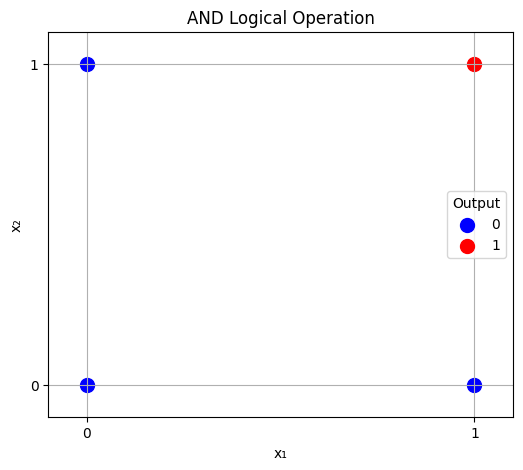

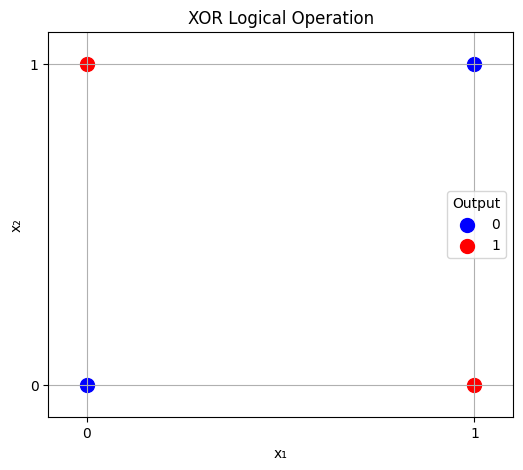


Optimized weights for AND operation:
w0 = -0.2500, w1 = 0.5000, w2 = 0.5000
Final MSE loss: 0.125000

Optimized weights for XOR operation:
w0 = 0.5000, w1 = 0.0000, w2 = 0.0000
Final MSE loss: 0.500000


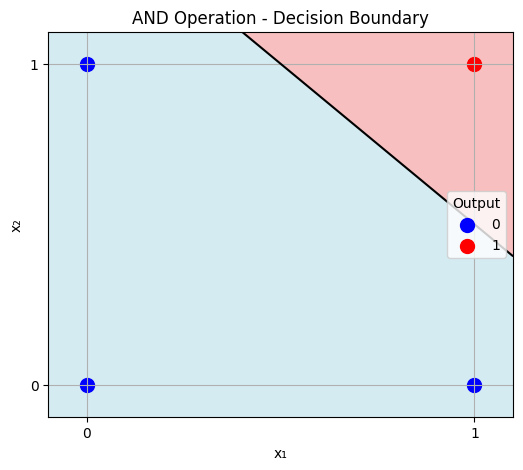

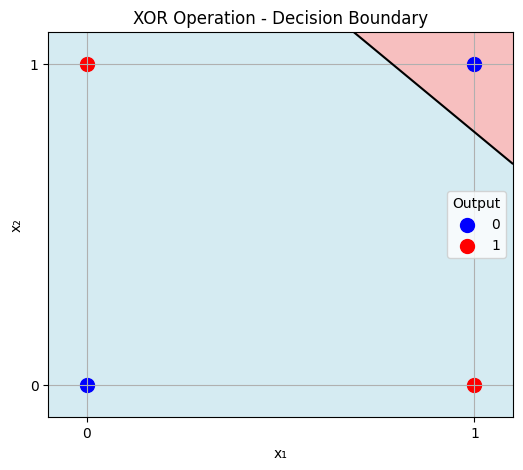

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Task 1:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

y_and = np.array([0, 0, 0, 1])
y_xor = np.array([0, 1, 1, 0])

# Task 2:
plt.figure(figsize=(6, 5))
plt.scatter(X[y_and == 0, 0], X[y_and == 0, 1], color='blue', label='0', s=100)
plt.scatter(X[y_and == 1, 0], X[y_and == 1, 1], color='red', label='1', s=100)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title("AND Logical Operation")
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(title='Output')
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(X[y_xor == 0, 0], X[y_xor == 0, 1], color='blue', label='0', s=100)
plt.scatter(X[y_xor == 1, 0], X[y_xor == 1, 1], color='red', label='1', s=100)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title("XOR Logical Operation")
plt.grid(True)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(title='Output')
plt.show()

# Task 3:
def linear_model(params, X):
    """Linear model: f(x) = w0 + w1*x1 + w2*x2"""
    w0, w1, w2 = params
    return w0 + w1 * X[:, 0] + w2 * X[:, 1]

def mse_loss(params, X, y):
    """Calculate MSE loss: 0.5 * sum((target - fitted)^2)"""
    y_pred = linear_model(params, X)
    return 0.5 * np.sum((y - y_pred) ** 2)

# Task 4:
initial_weights = [0.0, 0.0, 0.0]
result_and = minimize(mse_loss, initial_weights, args=(X, y_and), method='BFGS')
weights_and = result_and.x
print("\nOptimized weights for AND operation:")
print(f"w0 = {weights_and[0]:.4f}, w1 = {weights_and[1]:.4f}, w2 = {weights_and[2]:.4f}")
print(f"Final MSE loss: {result_and.fun:.6f}")

result_xor = minimize(mse_loss, initial_weights, args=(X, y_xor), method='BFGS')
weights_xor = result_xor.x
print("\nOptimized weights for XOR operation:")
print(f"w0 = {weights_xor[0]:.4f}, w1 = {weights_xor[1]:.4f}, w2 = {weights_xor[2]:.4f}")
print(f"Final MSE loss: {result_xor.fun:.6f}")

# Task 5:
x_min, x_max = -0.1, 1.1
y_min, y_max = -0.1, 1.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))
grid_points = np.c_[xx.ravel(), yy.ravel()]

Z_and = linear_model(weights_and, grid_points).reshape(xx.shape)
Z_xor = linear_model(weights_xor, grid_points).reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z_and, levels=[-1, 0.5, 2], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.contour(xx, yy, Z_and, levels=[0.5], colors='black', linestyles='-')
plt.scatter(X[y_and == 0, 0], X[y_and == 0, 1], color='blue', label='0', s=100)
plt.scatter(X[y_and == 1, 0], X[y_and == 1, 1], color='red', label='1', s=100)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title("AND Operation - Decision Boundary")
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(title='Output')
plt.show()

plt.figure(figsize=(6, 5))
plt.contourf(xx, yy, Z_xor, levels=[-1, 0.5, 2], colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.contour(xx, yy, Z_xor, levels=[0.5], colors='black', linestyles='-')
plt.scatter(X[y_xor == 0, 0], X[y_xor == 0, 1], color='blue', label='0', s=100)
plt.scatter(X[y_xor == 1, 0], X[y_xor == 1, 1], color='red', label='1', s=100)
plt.xlabel('x₁')
plt.ylabel('x₂')
plt.title("XOR Operation - Decision Boundary")
plt.grid(True)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks([0, 1])
plt.yticks([0, 1])
plt.legend(title='Output')
plt.show()

## Task 2

Implement a simple linear regression model for random data.

1. Generate some synthetic data. Take a polynomial function for instance, eg. $$x\cdot(x-0.5)\cdot(x-1)$$ and add some noise to it.
2. Plot the data.
3. Define a loss function you want to minimize. This can be for instance Root Mean Square (in practice is often bad, but really depends on the problem) or the MSE (double check if your implementation is compatible from the previous task!).
where target is the values you actually have from the data and fitted value comes from your model.
1. Implement a general polynomial function. It should take two arguments: $x$ and $w$
   - $x$ is a float, the input of the function
   - $w$ is the coefficient vector. It should have  a length of $n+1$ if you want to fit a $n$-th degree polynomial
   - then implement the good old formula of polynomial: $$f(x)=\sum_{i=0}^{n} w_ix^i$$
2. Find optimal weights for polynomials of degree $0,1,3,5,7,9$. Use `scipy.optimize.minimize` for optimum finding.
3. Plot the results!
4. You should see several interesting aspects. Mainly that the regressor starts to overfit heavily if it has a very high degree: it will hit the points, but will have a shape that does not resamble the initial data

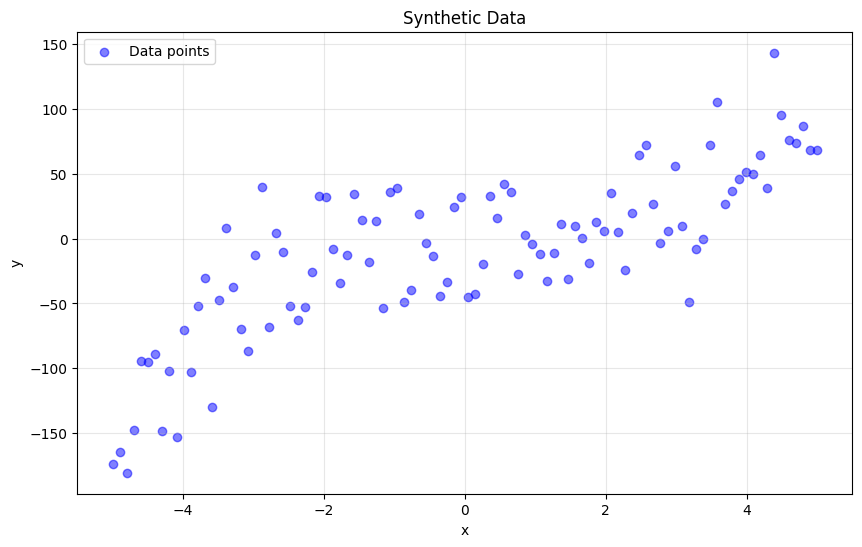

Degree 0 optimal weights: [-10.03395657]
Degree 1 optimal weights: [-10.03397605  16.62604558]
Degree 3 optimal weights: [ 0.76755565  0.39386249 -1.27051709  1.06085833]
Degree 5 optimal weights: [-4.47002513 -1.64197346  0.783986    1.43363015 -0.09400959 -0.01316196]
Degree 7 optimal weights: [-3.57991908e+00  2.17888128e+00  5.02376387e-02  8.31936630e-02
 -7.61147427e-03  1.03494582e-01 -2.48647650e-03 -2.83522012e-03]
Degree 9 optimal weights: [-7.90254061e+00 -1.34596845e+00  6.15575354e+00  2.11615564e+00
 -1.32663669e+00 -2.08207119e-01  8.73207956e-02  1.46676847e-02
 -1.88965264e-03 -3.24831850e-04]


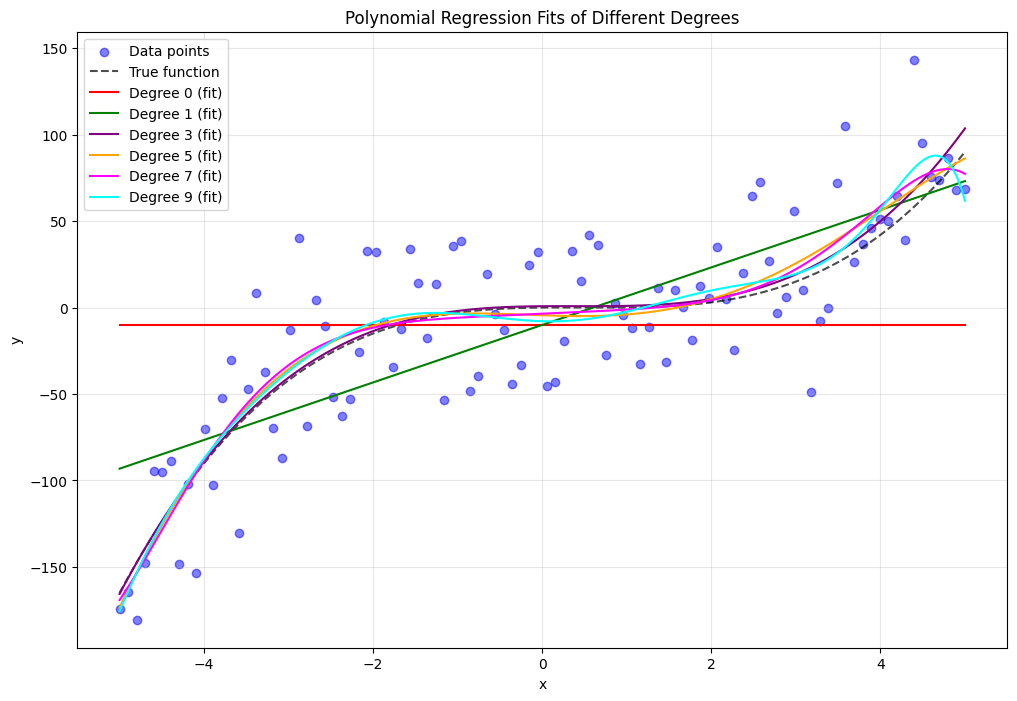

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from typing import Callable, List

# 1. Generate synthetic data
def generate_data(n_samples: int = 100, noise_level: float = 0.1) -> tuple:
    x = np.linspace(-5, 5, n_samples)
    y_true = x * (x - 0.5) * (x - 1) 
    noise = np.random.normal(0, noise_level, n_samples)
    y = y_true + noise
    return x, y

# 2. Plot the data
def plot_data(x: np.ndarray, y: np.ndarray, title: str = "Synthetic Data") -> None:

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 3. Define loss function (MSE)
def mse_loss(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.mean((y_true - y_pred) ** 2)

# 4. Implement general polynomial function
def polynomial(x: float, w: np.ndarray) -> float:
    return sum(w[i] * (x ** i) for i in range(len(w)))

def polynomial_vectorized(x: np.ndarray, w: np.ndarray) -> np.ndarray:
    result = np.zeros_like(x, dtype=float)
    for i, coef in enumerate(w):
        result += coef * (x ** i)
    return result

def objective(w: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    y_pred = polynomial_vectorized(x, w)
    return mse_loss(y, y_pred)

# 5. Find optimal weights for polynomials of different degrees
def fit_polynomials(x: np.ndarray, y: np.ndarray, degrees: List[int]) -> dict:
    results = {}
    
    for degree in degrees:
        n_params = degree + 1  
        initial_weights = np.ones(n_params)  
        
        result = minimize(
            objective, 
            initial_weights,
            args=(x, y),
            method='BFGS'
        )
        
        optimal_weights = result.x
        results[degree] = optimal_weights
        
    return results

# 6. Plot the results
def plot_fits(x: np.ndarray, y: np.ndarray, weights_dict: dict) -> None:
    plt.figure(figsize=(12, 8))
    
    plt.scatter(x, y, color='blue', alpha=0.5, label='Data points')
    
    x_fine = np.linspace(min(x), max(x), 1000)
    y_true = x_fine * (x_fine - 0.5) * (x_fine - 1)
    plt.plot(x_fine, y_true, 'k--', label='True function', alpha=0.7)
    
    colors = ['red', 'green', 'purple', 'orange', 'magenta', 'cyan']
    for i, (degree, weights) in enumerate(weights_dict.items()):
        y_pred = polynomial_vectorized(x_fine, weights)
        plt.plot(x_fine, y_pred, color=colors[i % len(colors)], 
                 label=f'Degree {degree} (fit)')
    
    plt.title('Polynomial Regression Fits of Different Degrees')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def main():
    x, y = generate_data(n_samples=100, noise_level=30)
    
    plot_data(x, y)
    
    degrees = [0, 1, 3, 5, 7, 9]
    weights_dict = fit_polynomials(x, y, degrees)
    
    for degree, weights in weights_dict.items():
        print(f"Degree {degree} optimal weights: {weights}")
    
    plot_fits(x, y, weights_dict)

if __name__ == "__main__":
    main()

## The same story in sklearn

In [3]:
X = x.reshape(-1,1)
Y = y.reshape(-1,1)
X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y
deg = 3
poly_features = PolynomialFeatures(degree=deg, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

NameError: name 'x' is not defined

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
lin_reg.intercept_, lin_reg.coef_

In [ ]:
X_new = np.linspace(0, 1, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label=f"fit of deg. {deg}")
plt.xlabel("$x_1$")
plt.legend()
plt.ylabel("$y$", rotation=0)

plt.grid()
plt.show()

### Example of overfitting

In [ ]:
plt.figure(figsize=(6, 4))

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

## Task 3: Logistic regression

1. Create a simple dataset using a **sigmoid function**:  
     $$
     y = \frac{1}{1 + e^{-(ax + b)}}
     $$ 
    Add some **Gaussian noise** to make the classification non-trivial.

2. Visualize the generated data.
3. Define the Logistic Model as:
    $$
     p = \sigma(w_0 + w_1 x)
    $$
    where $\sigma(z) = \frac{1}{1+e^{-z}}$ is the sigmoid function.

4. Define the Loss Function via the **Binary Cross-Entropy (Log Loss)** function:
     $$
     L(w) = - \sum_{i} \left[ y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right]
     $$
    This function ensures the model predicts probabilities close to 1 for positive labels and 0 for negative labels.

5. Optimize weights as done previously via `scipy`
6. Plot the results.

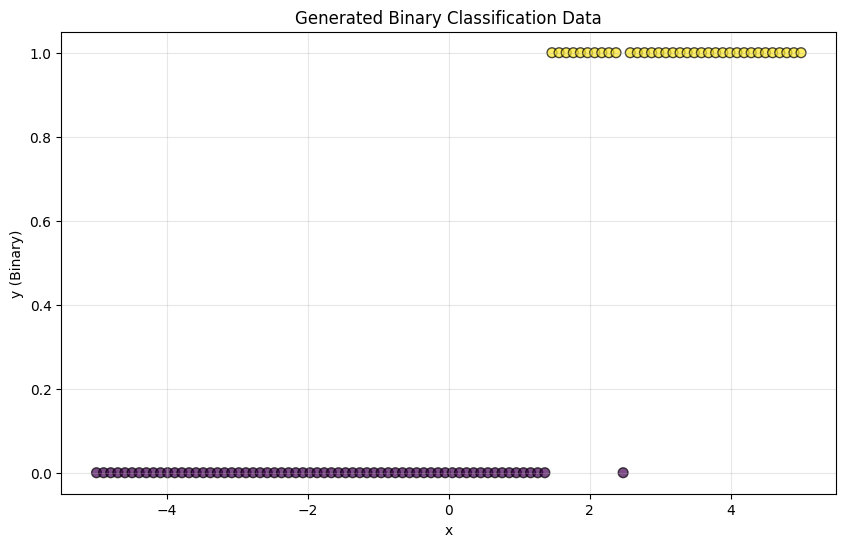

Optimal weights: w0=-6.0964, w1=4.0236
True parameters: b=-3.0000, a=2.0000


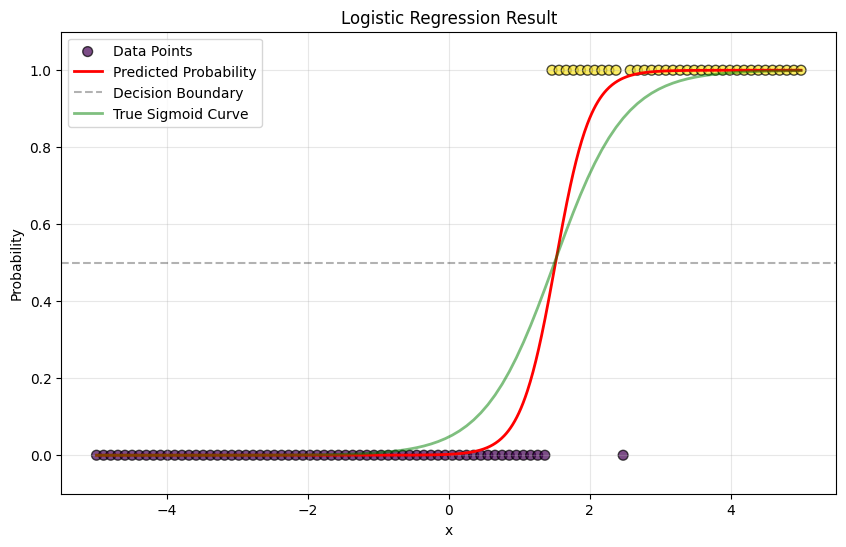

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Task 1:
np.random.seed(42)  

a = 2.0
b = -3.0
n_samples = 100
noise_scale = 0.2

x = np.linspace(-5, 5, n_samples)
y_true = 1 / (1 + np.exp(-(a * x + b)))
y_noisy = y_true + np.random.normal(0, noise_scale, n_samples)
y_binary = (y_noisy > 0.5).astype(int)

# Task 2:
plt.figure(figsize=(10, 6))
plt.scatter(x, y_binary, c=y_binary, cmap='viridis', edgecolors='k', s=50, alpha=0.7)
plt.title('Generated Binary Classification Data')
plt.xlabel('x')
plt.ylabel('y (Binary)')
plt.grid(True, alpha=0.3)
plt.show()

# Task 3 & 4:
initial_weights = [0.0, 0.0]
objective = lambda w, x, y: -np.sum(y * np.log(np.clip(1 / (1 + np.exp(-(w[0] + w[1] * x))), 1e-15, 1-1e-15)) + 
                              (1 - y) * np.log(np.clip(1 - 1 / (1 + np.exp(-(w[0] + w[1] * x))), 1e-15, 1-1e-15)))

result = minimize(objective, initial_weights, args=(x, y_binary), method='BFGS')
optimal_weights = result.x
print(f"Optimal weights: w0={optimal_weights[0]:.4f}, w1={optimal_weights[1]:.4f}")
print(f"True parameters: b={b:.4f}, a={a:.4f}")

# Task 6:
plt.figure(figsize=(10, 6))
plt.scatter(x, y_binary, c=y_binary, cmap='viridis', edgecolors='k', s=50, alpha=0.7, label='Data Points')

x_grid = np.linspace(-5, 5, 1000)
y_pred_proba = 1 / (1 + np.exp(-(optimal_weights[0] + optimal_weights[1] * x_grid)))
plt.plot(x_grid, y_pred_proba, 'r-', lw=2, label='Predicted Probability')
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.3, label='Decision Boundary')
plt.plot(x, y_true, 'g-', lw=2, alpha=0.5, label='True Sigmoid Curve')

plt.title('Logistic Regression Result')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 1.1)
plt.show()

## sklearn example

In [4]:
iris = load_iris(as_frame=True)
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

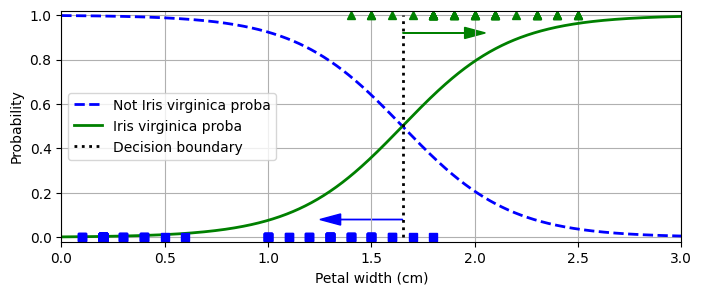

In [5]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

## Task 4: Classification and regularization with regression



In [6]:
# Generate Multiclass Data
np.random.seed(42)
X, y = make_classification(n_samples=200, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0)

# One-hot encoding for multiclass logistic regression
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

In [7]:

# Define Softmax Function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Define Multiclass Logistic Regression Model
def multiclass_model(W, X):
    return softmax(X @ W)  # Linear transformation + softmax activation

# Define Loss Function (Cross-Entropy)
def cross_entropy_loss(W, args):
    X, y = args
    m, n_classes = y.shape
    W = W.reshape((-1, n_classes))
    p = multiclass_model(W, X)
    return -np.sum(y * np.log(p + 1e-10)) / m


In [8]:
# Optimize Model Parameters
W_init = np.zeros((X.shape[1], y_one_hot.shape[1]))
W_opt = minimize(cross_entropy_loss, W_init.ravel(), [X, y_one_hot], method='BFGS').x.reshape(X.shape[1], -1)


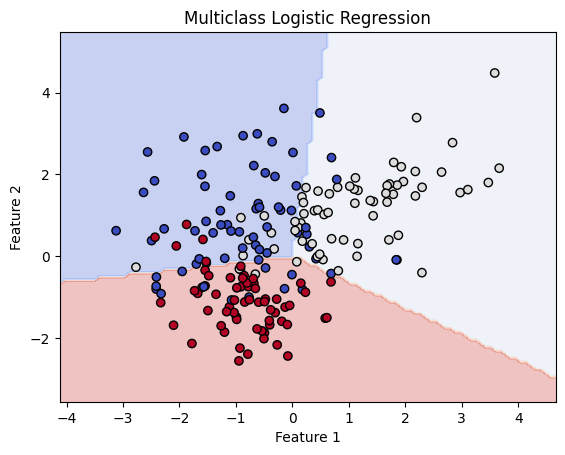

Optimized Weights: [[-0.75092006  1.10692536 -0.35600542]
 [ 0.90194029  0.68942201 -1.59136229]]


In [9]:

# Predict and Visualize Decision Boundaries
def predict(X, W):
    return np.argmax(multiclass_model(W, X), axis=1)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = predict(np.c_[xx.ravel(), yy.ravel()], W_opt).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.title('Multiclass Logistic Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Print optimized weights
print("Optimized Weights:", W_opt)


# Homeworks

## Task 1
**Total 4 points**


We showed during the previous exercises, that the chosen weight is quite sensitive to the loss. Now how can we tell the model to behave in more general way and to not over-fit on training data? Via **regularization**!

There are many ways and methods to do this, but two wide spread are `Ridge` and `Lasso` regularization. Your task is:

1. Take the `sklearn` examples from the class material. 
2. Based on those new linear regressors:
   1. `Ridge`. Loss:
        $$J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2$$
   2. `Lasso`
        $$J(\theta) = MSE(\theta) + \alpha\sum_{i=1}^{n}\lvert\theta_i\rvert$$
   3. `SGDRegressor`
3. Fit these models for the same data! They all have an extra parameter called `alpha` check what happens if you use different values. Please play around, different models work with different values. Pick at least 3 different for each!!!!
4. Remeber to add `PolyinomialFeatures`
5. Plot what you get!

**Idea**: Play with `StandardScaler`



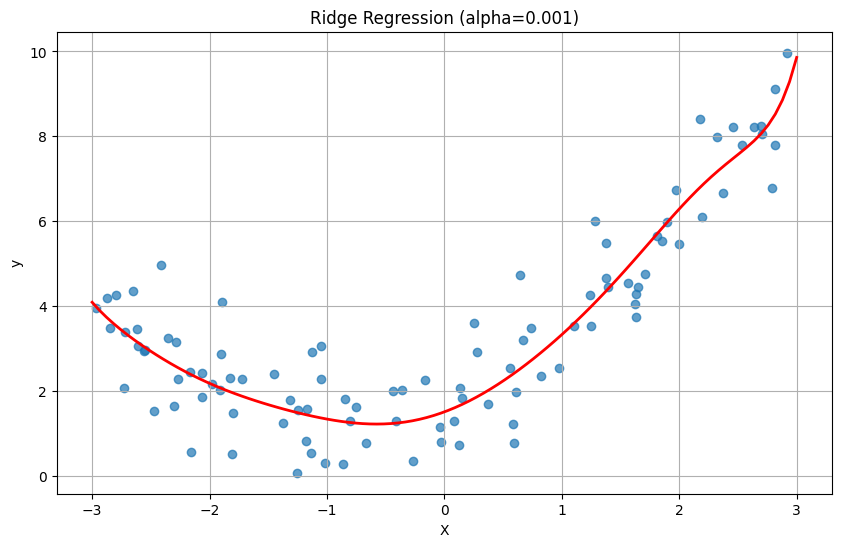

Ridge (alpha=0.001) - Train score: 0.8567, Test score: 0.8431


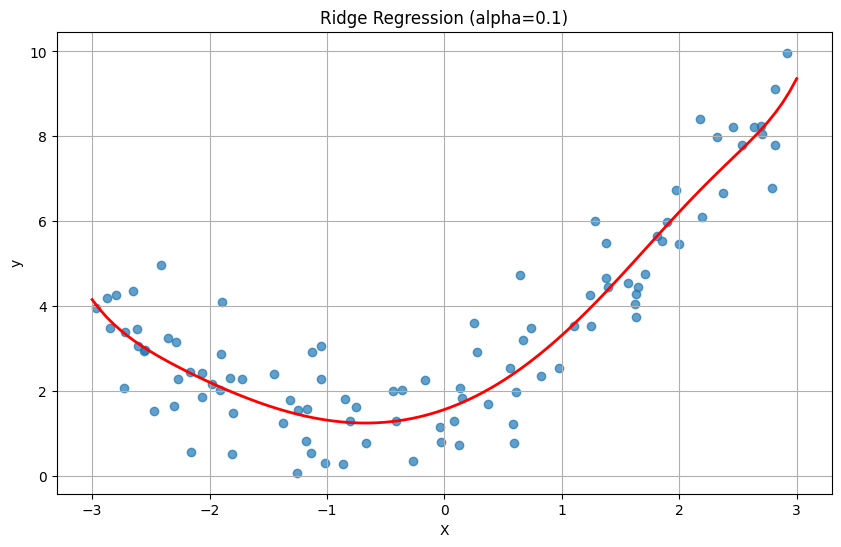

Ridge (alpha=0.1) - Train score: 0.8557, Test score: 0.8442


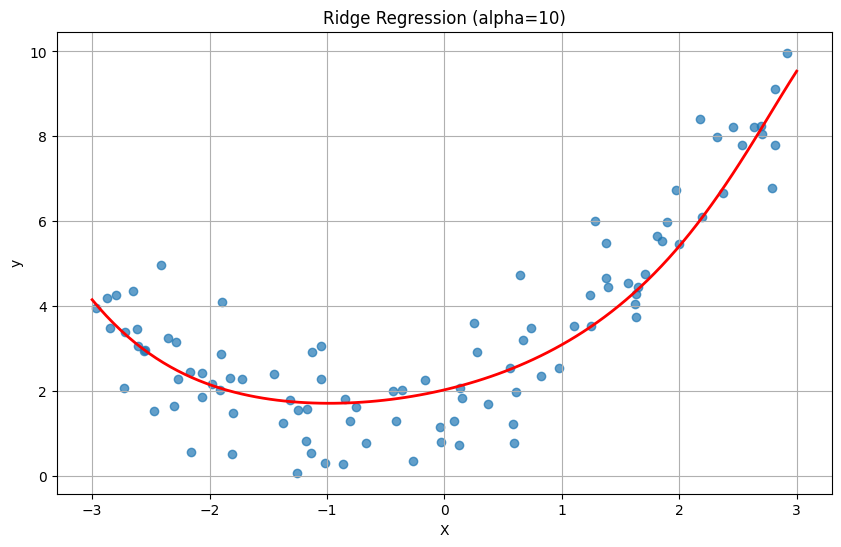

Ridge (alpha=10) - Train score: 0.8272, Test score: 0.8494


c:\Users\Volk\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.482e-01, tolerance: 4.337e-02
  model = cd_fast.enet_coordinate_descent(


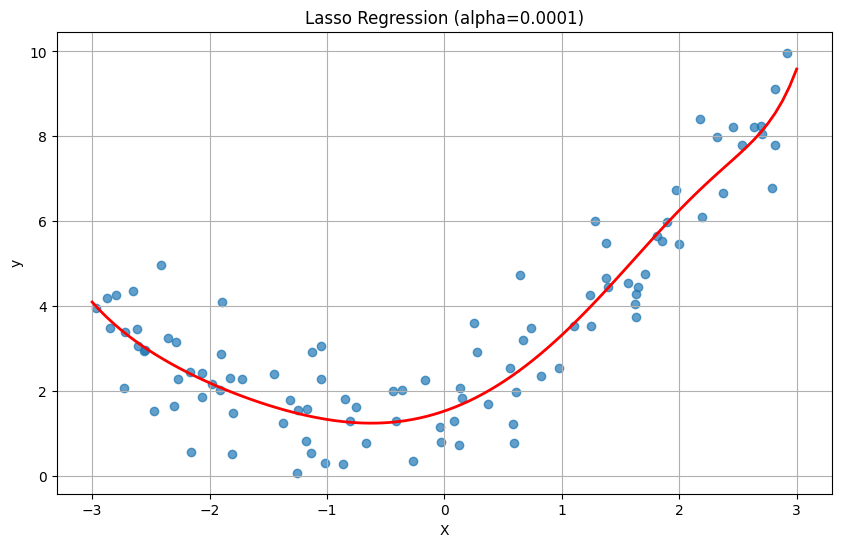

Lasso (alpha=0.0001) - Train score: 0.8560, Test score: 0.8407


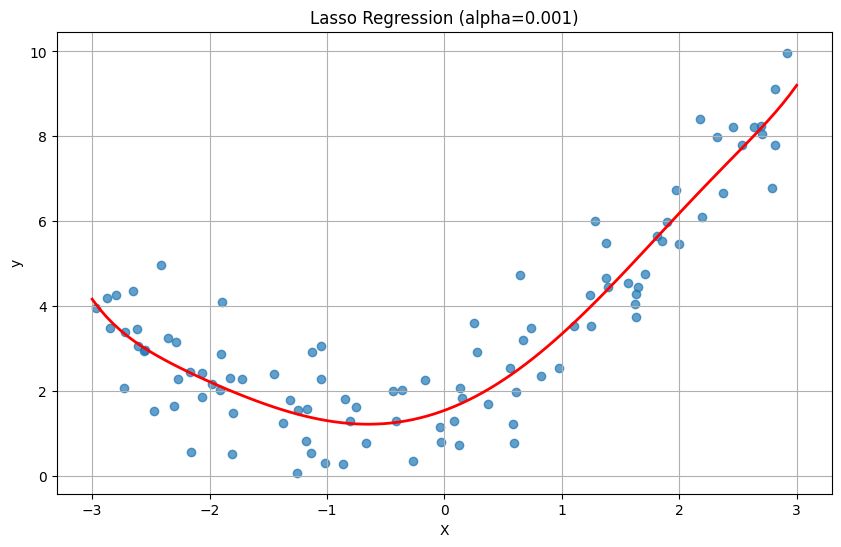

Lasso (alpha=0.001) - Train score: 0.8556, Test score: 0.8441


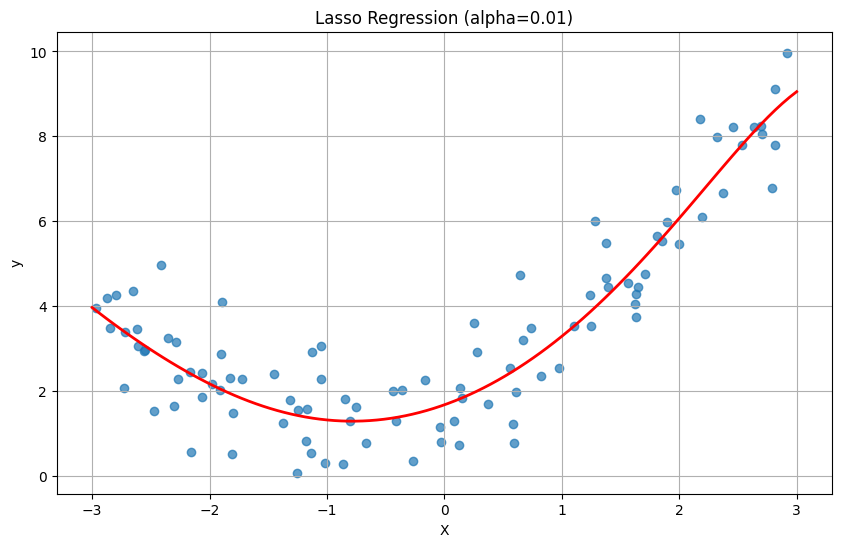

Lasso (alpha=0.01) - Train score: 0.8536, Test score: 0.8541


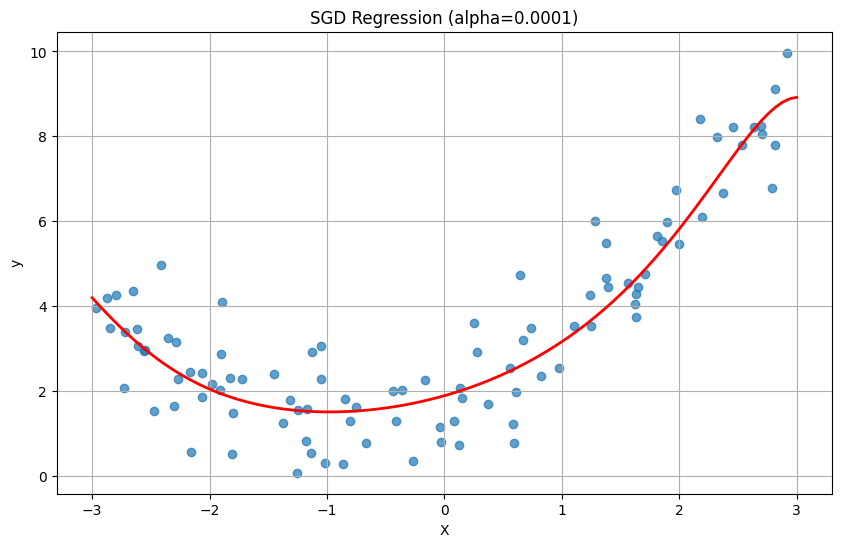

SGD (alpha=0.0001) - Train score: 0.8439, Test score: 0.8638


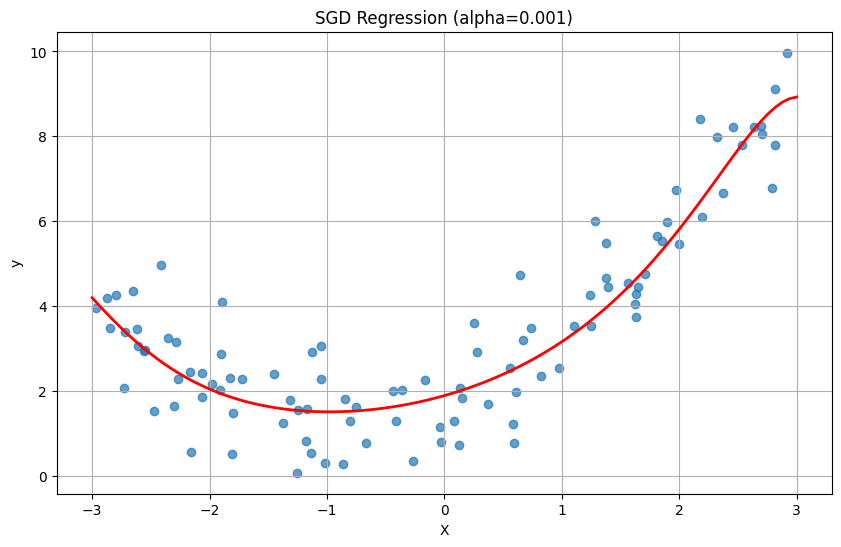

SGD (alpha=0.001) - Train score: 0.8438, Test score: 0.8638


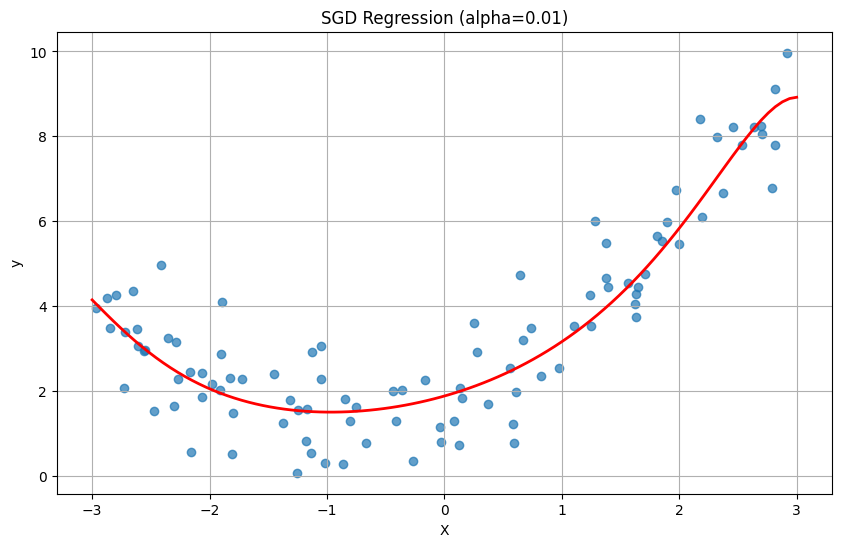

SGD (alpha=0.01) - Train score: 0.8444, Test score: 0.8637

Comparison of best models:
Best Ridge: alpha=10, Train score: 0.8272, Test score: 0.8494
Best Lasso: alpha=0.01, Train score: 0.8536, Test score: 0.8541
Best SGD: alpha=0.0001, Train score: 0.8439, Test score: 0.8638

Best overall model: SGD with alpha=0.0001 and test score: 0.8638


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# Generate some sample data
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a function to plot the models
def plot_model(model, title, alpha_value):
    # Create a range of X values for plotting
    X_new = np.linspace(-3, 3, 100).reshape(100, 1)
    
    # Predict using the model
    y_pred = model.predict(X_new)
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, alpha=0.7)
    plt.plot(X_new, y_pred, color='red', linewidth=2)
    plt.title(f'{title} (alpha={alpha_value})')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.grid(True)
    plt.show()

# Define the polynomial degree
degree = 10

# Ridge Regression with different alpha values
ridge_alphas = [0.001, 0.1, 10]
ridge_results = []
for alpha in ridge_alphas:
    ridge_poly_scaled = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha, random_state=42))
    ])
    ridge_poly_scaled.fit(X_train, y_train)
    plot_model(ridge_poly_scaled, "Ridge Regression", alpha)
    
    # Print the score
    train_score = ridge_poly_scaled.score(X_train, y_train)
    test_score = ridge_poly_scaled.score(X_test, y_test)
    print(f"Ridge (alpha={alpha}) - Train score: {train_score:.4f}, Test score: {test_score:.4f}")
    ridge_results.append((alpha, train_score, test_score))

# Lasso Regression with different alpha values
lasso_alphas = [0.0001, 0.001, 0.01]
lasso_results = []
for alpha in lasso_alphas:
    lasso_poly_scaled = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lasso_reg", Lasso(alpha=alpha, random_state=42, max_iter=10000))
    ])
    lasso_poly_scaled.fit(X_train, y_train)
    plot_model(lasso_poly_scaled, "Lasso Regression", alpha)
    
    # Print the score
    train_score = lasso_poly_scaled.score(X_train, y_train)
    test_score = lasso_poly_scaled.score(X_test, y_test)
    print(f"Lasso (alpha={alpha}) - Train score: {train_score:.4f}, Test score: {test_score:.4f}")
    lasso_results.append((alpha, train_score, test_score))

# SGD Regressor with different alpha values
sgd_alphas = [0.0001, 0.001, 0.01]
sgd_results = []
for alpha in sgd_alphas:
    sgd_poly_scaled = Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("sgd_reg", SGDRegressor(penalty='l2', alpha=alpha, random_state=42, max_iter=1000, tol=1e-3))
    ])
    sgd_poly_scaled.fit(X_train, y_train.ravel())
    plot_model(sgd_poly_scaled, "SGD Regression", alpha)
    
    # Print the score
    train_score = sgd_poly_scaled.score(X_train, y_train)
    test_score = sgd_poly_scaled.score(X_test, y_test)
    print(f"SGD (alpha={alpha}) - Train score: {train_score:.4f}, Test score: {test_score:.4f}")
    sgd_results.append((alpha, train_score, test_score))

# Find the best model for each regressor based on test score
best_ridge = max(ridge_results, key=lambda x: x[2])
best_lasso = max(lasso_results, key=lambda x: x[2])
best_sgd = max(sgd_results, key=lambda x: x[2])

# Compare the best models from each regressor
print("\nComparison of best models:")
print(f"Best Ridge: alpha={best_ridge[0]}, Train score: {best_ridge[1]:.4f}, Test score: {best_ridge[2]:.4f}")
print(f"Best Lasso: alpha={best_lasso[0]}, Train score: {best_lasso[1]:.4f}, Test score: {best_lasso[2]:.4f}")
print(f"Best SGD: alpha={best_sgd[0]}, Train score: {best_sgd[1]:.4f}, Test score: {best_sgd[2]:.4f}")

# Overall best model
all_models = [
    ("Ridge", best_ridge[0], best_ridge[2]),
    ("Lasso", best_lasso[0], best_lasso[2]),
    ("SGD", best_sgd[0], best_sgd[2])
]
best_overall = max(all_models, key=lambda x: x[2])
print(f"\nBest overall model: {best_overall[0]} with alpha={best_overall[1]} and test score: {best_overall[2]:.4f}")


## Task 2
**Total 6 points**

An Ecommerce company based in New York City sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

You'll work with the `ecommerce_customers.csv` file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member.

1. Explore the data to find the most correlated quantity to "Annual Spent" 
2. Split the data into test and train and train a linear regressor (you can use sklearn's `train_test_split` function)
3. Predict for the test set
4. Evaluate the model (via error functions, such as MSE, MAE, RMSE) and formulate a conclusion ion which department the company should invest!

In [9]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB
None

Sample Data:
                           Email  \
0      mstephenson@fernandez.com   
1              hduke@hotmail.com   
2               pallen@yahoo.com   
3        riverarebecca@gmail.com   
4  mstephens@davidson-herman.com   

                                             Address            Avatar  \
0       8

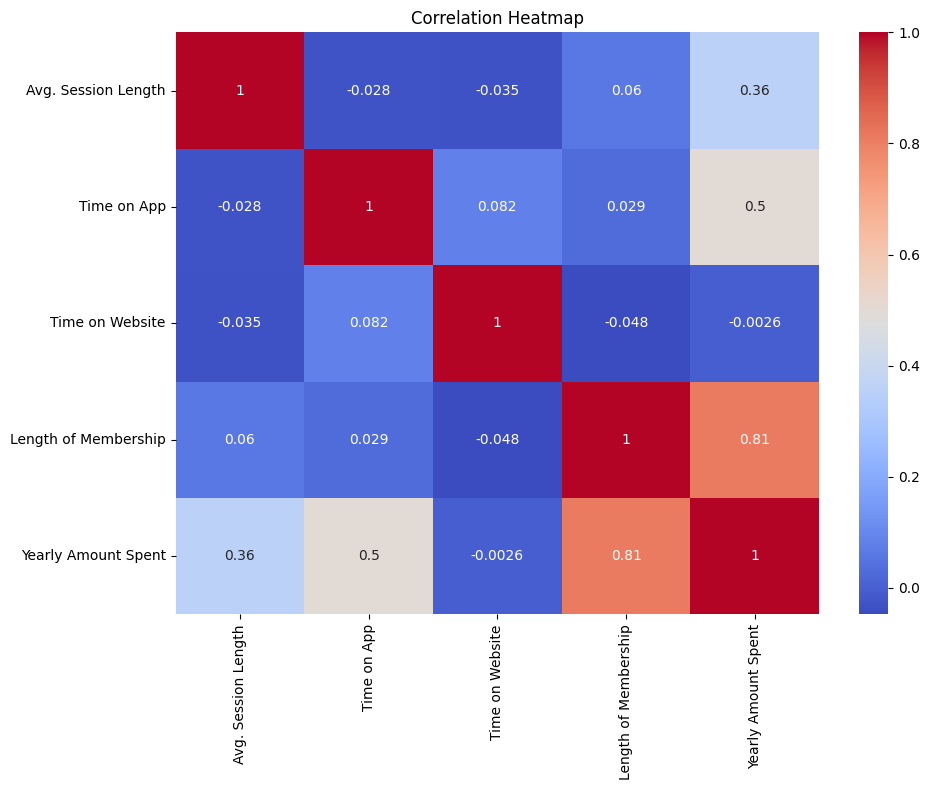

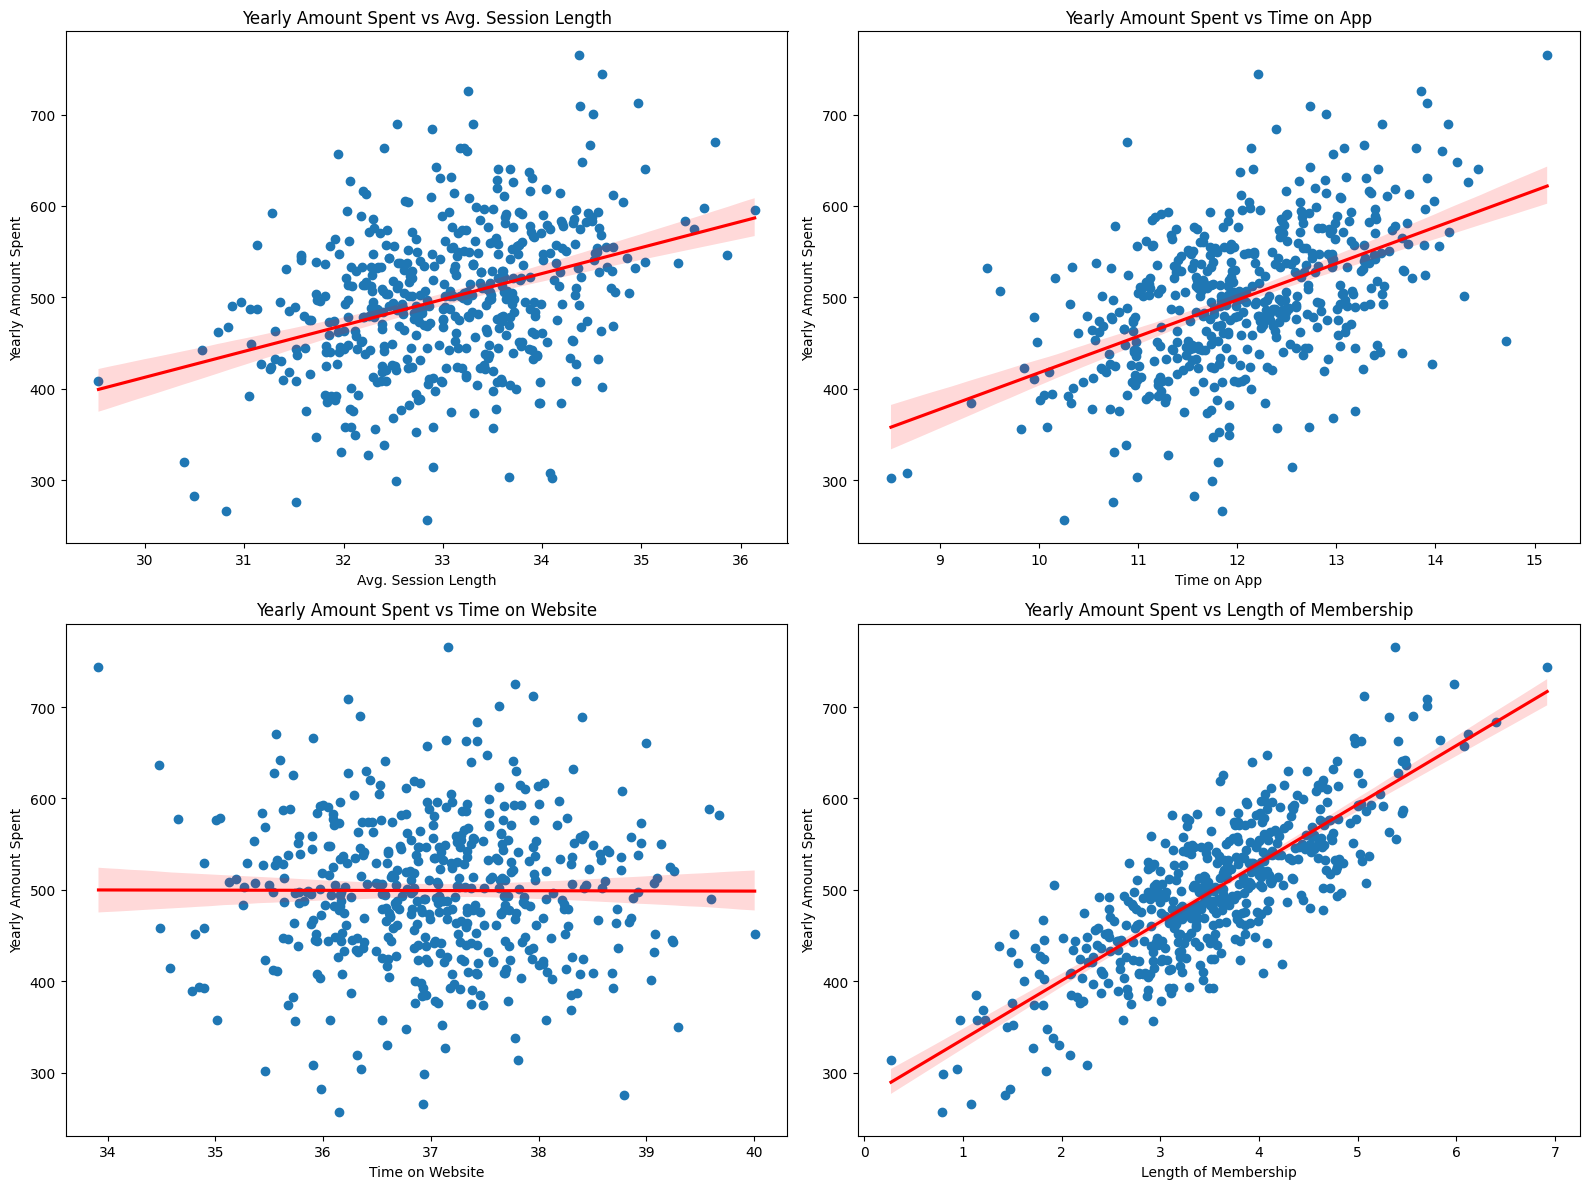

In [10]:

data = pd.read_csv('ecommerce_customers.csv')

print("Dataset Info:")
print(data.info())
print("\nSample Data:")
print(data.head())
print("\nStatistical Summary:")
print(data.describe())

numerical_features = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']
correlations = {}

for feature in numerical_features:
    correlation = data[feature].corr(data['Yearly Amount Spent'])
    correlations[feature] = correlation
    
print("\nCorrelations with Yearly Amount Spent:")
for feature, correlation in correlations.items():
    print(f"{feature}: {correlation:.4f}")

highest_corr_feature = max(correlations, key=correlations.get)
print(f"\nThe feature most correlated with Yearly Amount Spent is: {highest_corr_feature} "
      f"(correlation = {correlations[highest_corr_feature]:.4f})")

plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features + ['Yearly Amount Spent']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    plt.scatter(data[feature], data['Yearly Amount Spent'])
    plt.title(f'Yearly Amount Spent vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Yearly Amount Spent')
        
    sns.regplot(x=feature, y='Yearly Amount Spent', data=data, scatter=False, color='red')

plt.tight_layout()
plt.show()
plt.close()

Length of Membership is clearly the most correlated feature to annual spent. Followed by time spent on app.

In [11]:
X = data[numerical_features]
y = data['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


model = LinearRegression()
model.fit(X_train, y_train)

Training set size: 400 samples
Testing set size: 100 samples


LinearRegression()

Sample of actual vs predicted values:
         Actual   Predicted
361  401.033135  402.862301
73   534.777188  542.533257
374  418.602742  426.620119
155  503.978379  501.913864
104  410.069611  409.666655


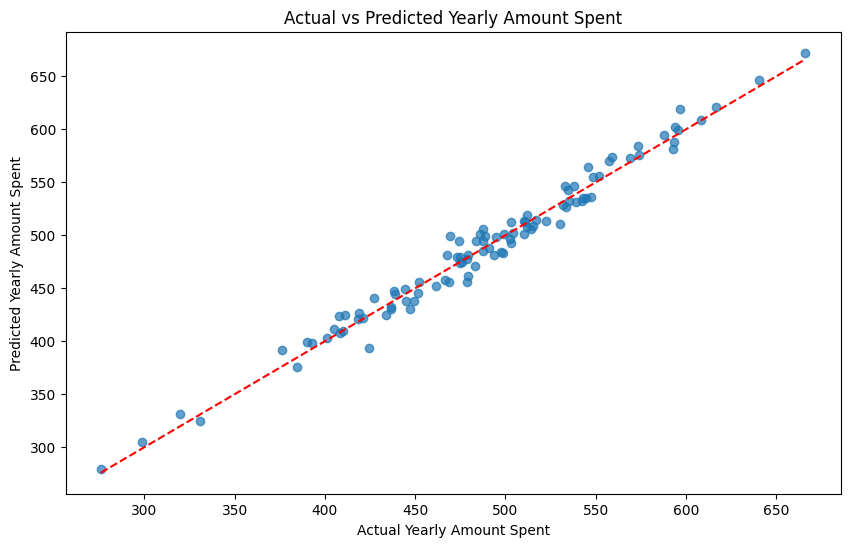

In [12]:
y_pred = model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("Sample of actual vs predicted values:")
print(results.head())

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.show()
plt.close()

Model Performance Metrics:
Mean Squared Error (MSE): 109.8637
Root Mean Squared Error (RMSE): 10.4816
Mean Absolute Error (MAE): 8.5584
R² Score: 0.9778

Features Ranked by Impact (Absolute Coefficient):
                      Coefficient  Abs_Coefficient
Length of Membership    61.896829        61.896829
Time on App             38.785346        38.785346
Avg. Session Length     25.596259        25.596259
Time on Website          0.310386         0.310386


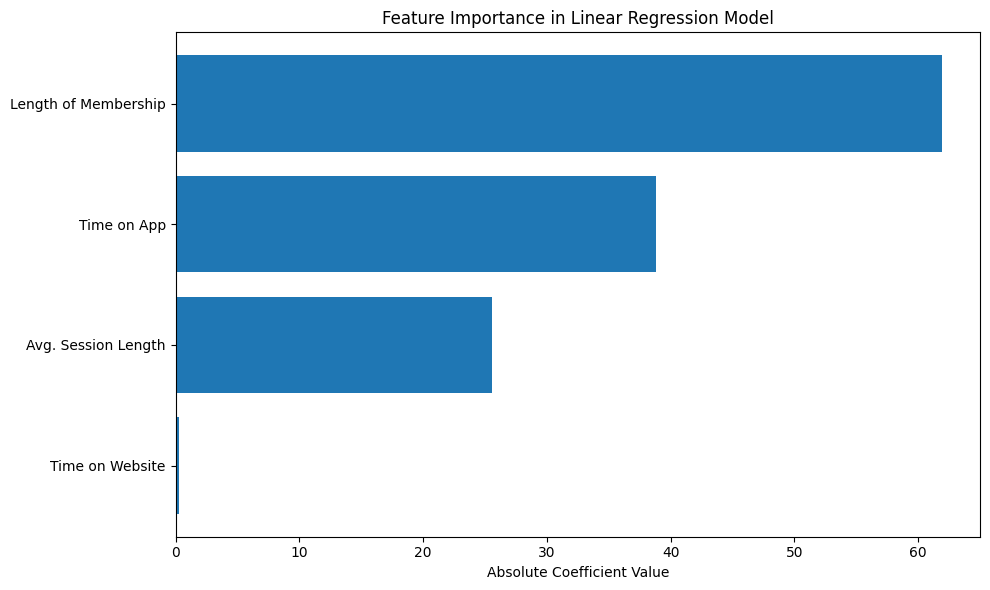


Comparison of App vs Website Impact:
'Time on App' coefficient: 38.7853
'Time on Website' coefficient: 0.3104


In [16]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values('Abs_Coefficient', ascending=False)
print("\nFeatures Ranked by Impact (Absolute Coefficient):")
print(sorted_coefficients)

plt.figure(figsize=(10, 6))
sorted_indices = np.argsort(np.abs(model.coef_))
plt.barh(np.array(X.columns)[sorted_indices], np.abs(model.coef_)[sorted_indices])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Linear Regression Model')
plt.tight_layout()
plt.show()
plt.close()

app_coef = model.coef_[numerical_features.index('Time on App')]
website_coef = model.coef_[numerical_features.index('Time on Website')]

print("\nComparison of App vs Website Impact:")
print(f"'Time on App' coefficient: {app_coef:.4f}")
print(f"'Time on Website' coefficient: {website_coef:.4f}")

RECOMMENDATION:
The company should focus their investment on the mobile app experience, as it has a stronger impact on yearly spending (coefficient: 38.7853) compared to the website (coefficient: 0.3104).

Additional Insight:
The model indicates that 'Length of Membership' has the strongest correlation with yearly spending.
The model can explain approximately 97.78% of the variance in yearly spending.